# Exploratory Data Analysis
The following analysis aims to shed light on a dataset of hotel reservations.

## Use Case: Predict Hotel Booking Cancellations
### Problem Description: 
Hotel cancellations pose a challenge in the hospitality business. Clients expect to be able to enjoy the advertised amenities. Ensuring everything runs smoothly requires careful planning and is always affected by the number of guests. Hence cancelled bookings lead to revenue loss and inefficiencies in resource allocation. A variety of factors may lead to a cancellation. 

### Solution 
Supervised machine learning, could help mitigate the issues resulting from cancellations that seem to be happening unexpectedly. A classification model can be trained using historical booking data in order to predict whether or not a combination of features is likely to lead to a cancellation. Specifically, the goal is to predict the number of cancellations for a sufficiently sized dataset. 

### Github Repository 
https://github.com/tseidel0509/Supervised_ML.git 

### Data Source
The dataset used is from Kaggle and contains hotel reservations, a total of 32 columns with one target feature. It consists of numerical and categorical features. 

Hotel Booking Dataset. (2022, June 5). Kaggle. https://www.kaggle.com/datasets/somnathnaskar/hotel-booking-dataset?select=hotel_bookings.csv

In [56]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow import keras
from tabulate import tabulate
import seaborn as sns

#### Import the Dataset

In [5]:
file_path = "/Users/timseidel/Documents/Graduate_Certificate/FinalProject_SupervisedLearning/archive/hotel_bookings.csv"
df = pd.read_csv(file_path)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02-07-15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02-07-15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03-07-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-17
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-17
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-17
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-17


#### Display Column Information and Summary Statistics

In [7]:
print("The following lists the Columns, Non-Null Count, and Datatype:")
print(df.info())
print("\n The following lists descriptive summary statistics of the numerical columns:")
print(tabulate(df.describe().T, headers = "keys", tablefmt= "pretty"))

The following lists the Columns, Non-Null Count, and Datatype:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies         

There exist negative Average Daily Rates which is weird. These will be dealt with later. The following is a list describing a couple columns:
- lead_time: the number of days prior to reservation begin
- deposit_type: the medium used for the deposit (cash, card)
- country: where the guests are from
- adults: number of adults
- adr: Average Daily Rate

The dataset consists of 119390 rows and 32 columns.

#### Plot the Number of Adults per Booking by Hotel Type

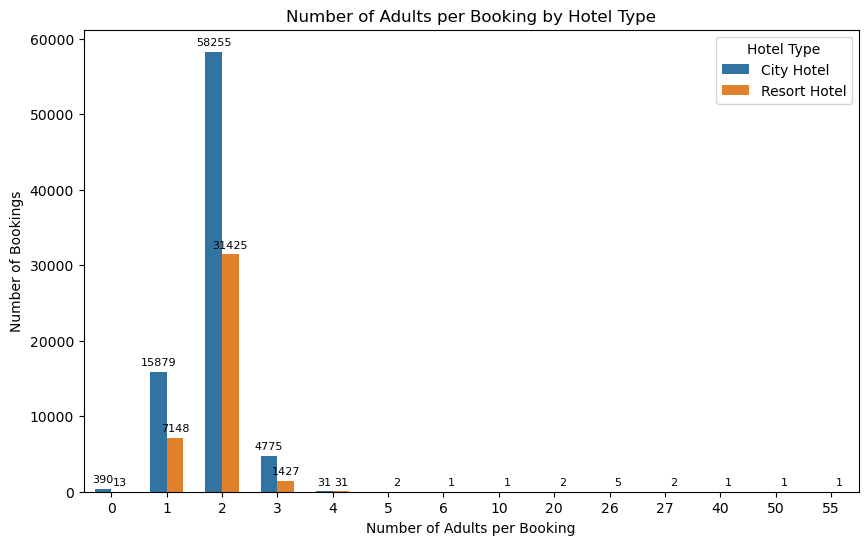

In [68]:
# Group data by hotel type and number of adults
adult_counts = df.groupby(["hotel", "adults"]).size().reset_index(name="count")

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=adult_counts, x="adults", y="count", hue="hotel", width=0.6)

# Annotate each bar with the actual count
for container in ax.containers:
    ax.bar_label(container, fmt="%d", label_type="edge", fontsize=8, padding=3)

plt.xlabel("Number of Adults per Booking")
plt.ylabel("Number of Bookings")
plt.title("Number of Adults per Booking by Hotel Type")
plt.xticks(rotation=0)
plt.legend(title="Hotel Type")

plt.show()

Clearly the City-Hotel has more adult guests, which tends to go hand in hand with more business trips. The resort hotel typically will have more families that include children. 

#### Plot the Lead Time vs the Average Price

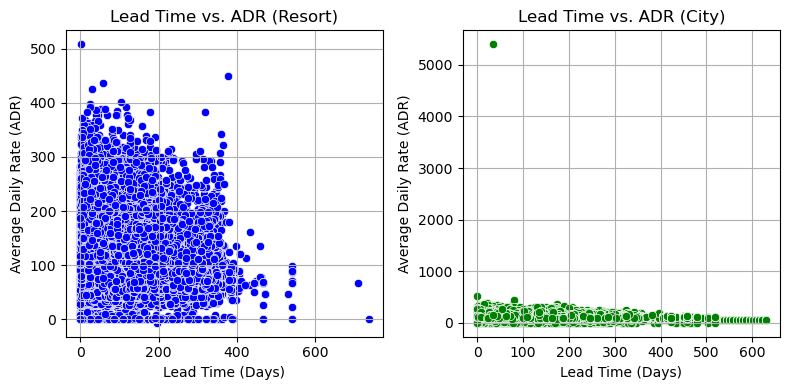

Number of bookings where ADR is 0: 1959
Number of booking where ADR is negative: 1


In [12]:
# Split by data relating to the Resort- and City-Hotel
resort_hotel_df = df[df['hotel'] == 'Resort Hotel']
city_hotel_df = df[df['hotel'] == 'City Hotel']

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

sns.scatterplot(data=resort_hotel_df, x="lead_time", y="adr", ax=axes[0], color='blue')
axes[0].set_xlabel("Lead Time (Days)")
axes[0].set_ylabel("Average Daily Rate (ADR)")
axes[0].set_title("Lead Time vs. ADR (Resort)")
axes[0].grid(True)

sns.scatterplot(data=city_hotel_df, x="lead_time", y="adr", ax=axes[1], color='green')
axes[1].set_xlabel("Lead Time (Days)")
axes[1].set_ylabel("Average Daily Rate (ADR)")
axes[1].set_title("Lead Time vs. ADR (City)")
axes[1].grid(True)

plt.tight_layout()
plt.show()

num_zero_adr = (df["adr"] == 0).sum()
less_zero_adr = (df["adr"] < 0).sum()
print(f"Number of bookings where ADR is 0: {num_zero_adr}")
print(f"Number of booking where ADR is negative: {less_zero_adr}")

Based on the above plot and the metrics it has become apparent that there exist a number of bookings where the average daily rate is 0 and one where it is negative. Upon inspection of the dataset there also appear to be a number of cases where there exist bookings that have not been cancelled, but where the "stays_in_weekend_nights" & "stays_in_week_nights" are both 0. None of this makes any real sense, so lets remove those data points. 

#### Remove Nonsensical Datapoints

In [14]:
df_filtered = df[df["adr"] != 0] # Keeps datapoints with ADR != 0
df_filtered = df_filtered[df_filtered["adr"] > 0] # Keeps datapoints with ADR > 0
# Removes datapoints that have not been cancelled but where "stays_in_weekend_nights" & "stays_in_week_nights" are 0
df_filtered = df_filtered[
    ~((df_filtered["is_canceled"] == 0) & 
      (df_filtered["stays_in_week_nights"] == 0) & 
      (df_filtered["stays_in_weekend_nights"] == 0))
]

num_zero_adr = (df_filtered["adr"] == 0).sum()
print(f"Number of bookings where ADR is 0: {num_zero_adr}")
num_zero_adr = (df_filtered["is_canceled"] == 1).sum()
print(f"Number of bookings that were canceled: {num_zero_adr}")
less_zero_adr = (df_filtered["adr"] < 0).sum()
print(f"Number of booking where ADR is negative: {less_zero_adr}")

Number of bookings where ADR is 0: 0
Number of bookings that were canceled: 44011
Number of booking where ADR is negative: 0


#### Plot Lead Time vs Booking Status

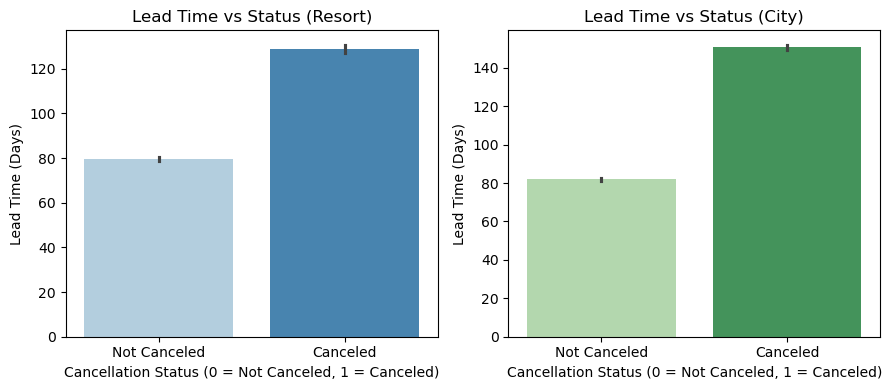

In [16]:
# Use filtered dataset to split according to hotel type
resort_hotel_df_filtered = df_filtered[df_filtered['hotel'] == 'Resort Hotel']
city_hotel_df_filtered = df_filtered[df_filtered['hotel'] == 'City Hotel']

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.barplot(data=resort_hotel_df_filtered, x="is_canceled", y="lead_time", ax=axes[0], hue="is_canceled", palette='Blues', legend=False)
axes[0].set_xlabel("Cancellation Status (0 = Not Canceled, 1 = Canceled)")
axes[0].set_ylabel("Lead Time (Days)")
axes[0].set_title("Lead Time vs Status (Resort)")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Not Canceled', 'Canceled'])
axes[0].grid(False)

sns.barplot(data=city_hotel_df_filtered, x="is_canceled", y="lead_time", ax=axes[1], hue="is_canceled", palette='Greens', legend=False)
axes[1].set_xlabel("Cancellation Status (0 = Not Canceled, 1 = Canceled)")
axes[1].set_ylabel("Lead Time (Days)")
axes[1].set_title("Lead Time vs Status (City)")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Not Canceled', 'Canceled'])
axes[1].grid(False)

plt.tight_layout()
plt.show()

In general, a longer lead time is more likely to lead to a booking being cancelled, in both cases. 

#### Plot Canceled vs. Not Canceled Bookings

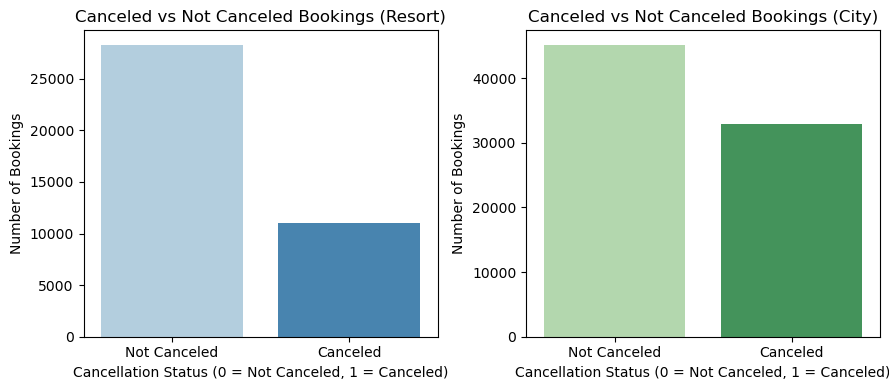

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.countplot(data=resort_hotel_df_filtered, x="is_canceled", ax=axes[0], hue="is_canceled", palette='Blues', legend=False)
axes[0].set_xlabel("Cancellation Status (0 = Not Canceled, 1 = Canceled)")
axes[0].set_ylabel('Number of Bookings')
axes[0].set_title('Canceled vs Not Canceled Bookings (Resort)')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Not Canceled', 'Canceled'])
axes[0].grid(False)

sns.countplot(data=city_hotel_df_filtered, x="is_canceled", ax=axes[1], hue="is_canceled", palette='Greens', legend=False)
axes[1].set_xlabel("Cancellation Status (0 = Not Canceled, 1 = Canceled)")
axes[1].set_ylabel('Number of Bookings')
axes[1].set_title('Canceled vs Not Canceled Bookings (City)')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Not Canceled', 'Canceled'])
axes[1].grid(False)

plt.tight_layout()
plt.show()

The percentage of bookings that are cancelled is higher for the City-Hotel.

#### Plot Distribution of Special Requests vs. Cancellation

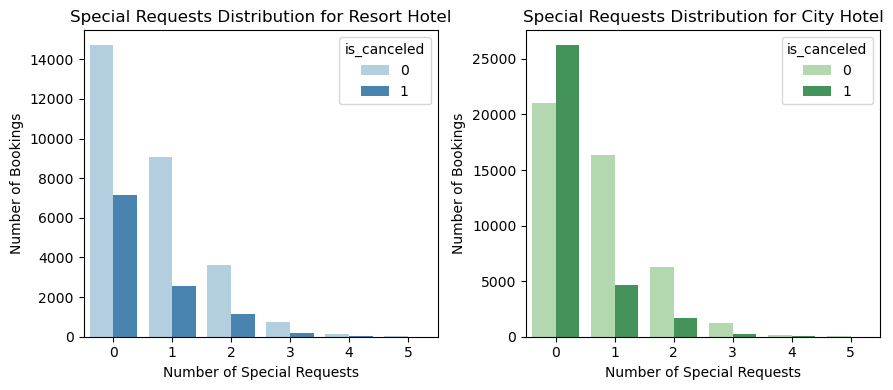

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(9, 4))  # 1 row, 2 columns

# Countplot for Resort Hotel
sns.countplot(data=resort_hotel_df_filtered, x='total_of_special_requests', hue='is_canceled', ax=axes[0], palette='Blues', dodge=True)
axes[0].set_xlabel("Number of Special Requests")
axes[0].set_ylabel("Number of Bookings")
axes[0].set_title("Special Requests Distribution for Resort Hotel")
axes[0].set_xticks(range(0, int(resort_hotel_df_filtered['total_of_special_requests'].max()) + 1))
axes[0].set_xticklabels(range(0, int(resort_hotel_df_filtered['total_of_special_requests'].max()) + 1))
axes[0].grid(False)

# Countplot for City Hotel
sns.countplot(data=city_hotel_df_filtered, x='total_of_special_requests', hue='is_canceled', ax=axes[1], palette='Greens', dodge=True)
axes[1].set_xlabel("Number of Special Requests")
axes[1].set_ylabel("Number of Bookings")
axes[1].set_title("Special Requests Distribution for City Hotel")
axes[1].set_xticks(range(0, int(city_hotel_df_filtered['total_of_special_requests'].max()) + 1))
axes[1].set_xticklabels(range(0, int(city_hotel_df_filtered['total_of_special_requests'].max()) + 1))
axes[1].grid(False)

# Show the plots
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

The trend suggests the number of cancelled booking decreases as the number of special requests increases. However, the number of overall bookings also decreases as the number of special requests increases. This necessitates calculating the percentage decrease between special requests for cancelled and not-cancelled bookings. 

#### Calculate Percentage Decrease in Bookings (Cancelled, Not Cancelled) with Special Requests

In [75]:
def percentage_decrease(series):
    return ((series.iloc[0] - series) / series.iloc[0]) * 100

# Group data by number of special requests and cancellation status
resort_counts = resort_hotel_df_filtered.groupby(['total_of_special_requests', 'is_canceled']).size().unstack(fill_value=0)
city_counts = city_hotel_df_filtered.groupby(['total_of_special_requests', 'is_canceled']).size().unstack(fill_value=0)

resort_decrease = resort_counts.apply(percentage_decrease)
city_decrease = city_counts.apply(percentage_decrease)

# Rename columns
resort_decrease.columns = ['Not Canceled % Decrease', 'Canceled % Decrease']
city_decrease.columns = ['Not Canceled % Decrease', 'Canceled % Decrease']

print("Resort Hotel Percentage Decrease in Bookings:")
print(resort_decrease)

print("\nCity Hotel Percentage Decrease in Bookings:")
print(city_decrease)


Resort Hotel Percentage Decrease in Bookings:
                           Not Canceled % Decrease  Canceled % Decrease
total_of_special_requests                                              
0                                         0.000000             0.000000
1                                        38.523700            63.850028
2                                        75.397257            84.275322
3                                        95.056363            97.677672
4                                        99.137580            99.790151
5                                        99.911721            99.986010

City Hotel Percentage Decrease in Bookings:
                           Not Canceled % Decrease  Canceled % Decrease
total_of_special_requests                                              
0                                         0.000000             0.000000
1                                        21.965731            82.118373
2                                        70.0

In the case of the Resort the percentage decrease is similar for special request between 1 and 5. There exists a significant decrease in cancellations and less significant decrease in not cancelled bookings from 0 to 1 special request. Suggesting that 1 special request has a positive effect on booking status. For the city hotel this is even more apparent. In fact, if no special requests have been communicated the probability of a cancellation is higher than not. 

#### Plot Total vs Canceled Bookings per Hotel per Month

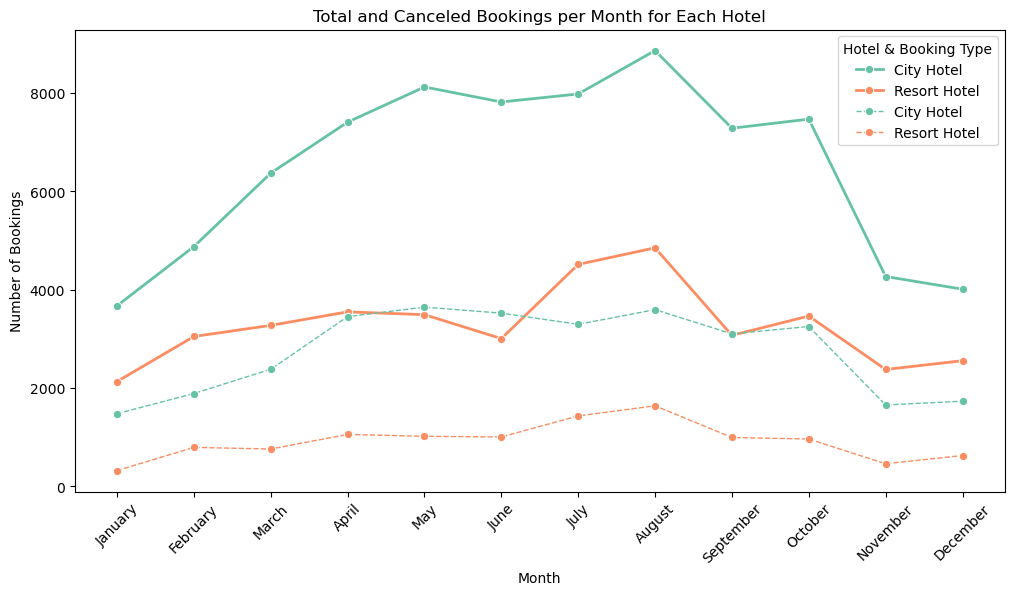

In [24]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
               'September', 'October', 'November', 'December']
df_filtered['arrival_date_month'] = pd.Categorical(df_filtered['arrival_date_month'], categories=month_order, ordered=True)

# Group data to get total bookings per month per hotel
monthly_bookings = df_filtered.groupby(['arrival_date_month', 'hotel'], observed=False).size().reset_index(name='total_bookings')

# Filter canceled bookings and group data
df_canceled = df_filtered[df_filtered['is_canceled'] == 1]
monthly_canceled = df_canceled.groupby(['arrival_date_month', 'hotel'], observed=False).size().reset_index(name='canceled_bookings')

# Merge total and canceled bookings
merged_data = pd.merge(monthly_bookings, monthly_canceled, on=['arrival_date_month', 'hotel'], how='left')
merged_data['canceled_bookings'] = merged_data['canceled_bookings']

# Plot total bookings (solid line)
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_data, x='arrival_date_month', y='total_bookings', hue='hotel', 
             marker='o', palette='Set2', linewidth=2, linestyle='solid')
# Plot canceled bookings (dashed line)
sns.lineplot(data=merged_data, x='arrival_date_month', y='canceled_bookings', hue='hotel', 
             marker='o', palette='Set2', linewidth=1, linestyle='dashed')

plt.title('Total and Canceled Bookings per Month for Each Hotel')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend(title='Hotel & Booking Type')
plt.show()

In both cases August is the month that yields the most number of bookings. Moreover, the cancellations (dashed lines) show a similar trend. In case of a different trend for cancelled booking this would have necessitated a closer analysis.

#### Calculate Correlation and Display Heatmap

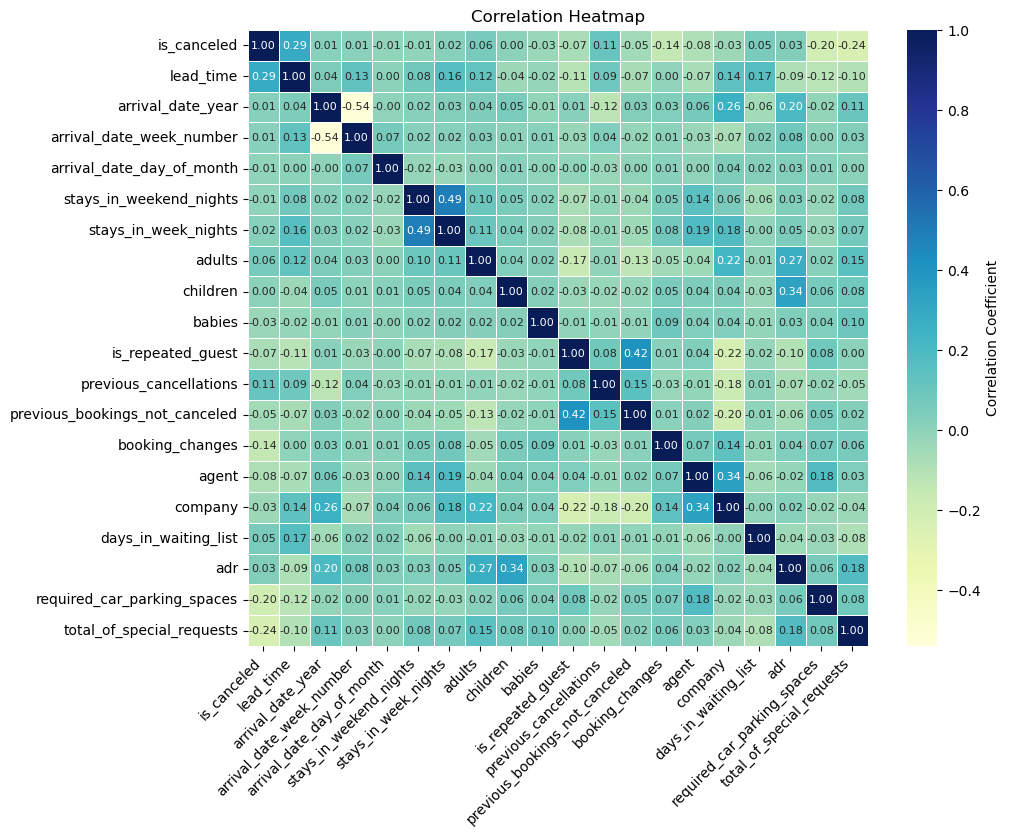

In [26]:
df_numeric = df_filtered.select_dtypes(include=['float64', 'int64'])
corr = df_numeric.corr()

# Create heatmap with annotations 
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Correlation Coefficient'}, 
            linewidths=0.5, annot_kws={"size": 8})

plt.title("Correlation Heatmap")
plt.xticks(rotation=45, ha="right")
plt.show()

There exist correlated columns such as 'previous_booking_not_cancelled' and is_repeated_guest' which makes sense. Being a repeated guest means at least on one previous booking was not cancelled. Agent and company is also correlated quite highly.

#### Drop Irrelevant Columns
The following columns have been deemed irrelevant because: 
- 'arrival_date_week_number' is contained in the month, day, year
- 'distribution_channel' is contained in the 'market_segment'
- 'previous_bookings_not_canceled' is contained in 'previous_cancellations
- 'agent' contains the Agent specific number which has been anonymized. Whether or not an agent was involved in the booking is contained in 'market_segment'
- 'reservation_status' is contained in 'is_canceled' and would have led to data leakage
- 'reservation_status_date' is contained in the month, day, year

In [28]:
columns_to_drop = [
    'arrival_date_week_number', 'distribution_channel', 'previous_bookings_not_canceled',
    'agent', 'reservation_status', 'reservation_status_date'
]

df_filtered = df_filtered.drop(columns=columns_to_drop)

#### Check For and Handle Null/NaN Values

In [30]:
df_filtered.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           467
market_segment                      0
is_repeated_guest                   0
previous_cancellations              0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
company                        111051
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_special_requests           0
dtype: int64

Given that there exist 2 columns with null values these have to be handled. Given that only 6% of the datapoints contain a company ID, the entire column shall be dropped, instead of dropping the values with associated NaN company ID's. In the cases of "country" the respective datapoints shall be dropped. 

In [32]:
df_filtered = df_filtered.drop("company", axis = 1)
df_filtered = df_filtered.dropna()
df_filtered.isnull().sum()

hotel                          0
is_canceled                    0
lead_time                      0
arrival_date_year              0
arrival_date_month             0
arrival_date_day_of_month      0
stays_in_weekend_nights        0
stays_in_week_nights           0
adults                         0
children                       0
babies                         0
meal                           0
country                        0
market_segment                 0
is_repeated_guest              0
previous_cancellations         0
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
adr                            0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

The above shows that all Null values have been handled accordingly. 

#### Label Encode Categorical Values
Given that the dataset contains categorical values as seen in 'Display Column Information and Summary Statistics' they need to be encoded to numerical values. While One-Hot Encoding would have made more sense for the categorical values, given that they have no inherent order, this would have dramatically increased the dimensionality of the dataset. Therefore, I chose to utilize label encoding. 

In [34]:
df_numeric_filtered = df_filtered.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

categorical_columns = [
    'hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'reserved_room_type', 'assigned_room_type', 
    'deposit_type', 'customer_type'
]

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    df_numeric_filtered[col] = label_encoder.fit_transform(df_numeric_filtered[col].astype(str))

# Save the encoded DataFrame (if needed)
df_numeric_filtered.to_csv('encoded_hotel_data.csv', index=False)
df_filtered.to_csv('hotel_data_filtered.csv', index=False)

The data has now been explored, irrelevant columns have been removed and categorical values have been label encoded. The dataset is now ready to be further preprocessed for model training. See 'model_classification.ipnyb'. 